In [8]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import warnings 

In [9]:
# Import master table
df = pd.read_csv('..\Data Wrangling - Capstone 2/master.csv', index_col=0)

In [10]:
# Clean data types
df['Price'] = pd.to_numeric(df['Price'].str.replace(",", "", regex=True))

df['Trans_Price'] = pd.to_numeric(df['Trans_Price'].str.replace(",", "", regex=True).str.replace("$","", regex=True))

df['Price per SA'] = pd.to_numeric(df['Price per SA'].str.replace(",", "", regex=True).str.replace("$","", regex=True))

df['Date_PASP'] = pd.to_datetime(df['Date_PASP'])

df['Date_ASP'] = pd.to_datetime(df['Date_ASP'])

df['first_sale'] = pd.to_datetime(df['first_sale'])

df.head()

,ID,Tower,Floor,Unit,Area,Flat Type,No. of Rooms,Price,Price per SA,PL_no,Date_PASP,Date_ASP,Trans_Price,Payment_Terms,first_sale
0,One_VicTower 1A1A,Tower 1A,1,A,643,3BR + 2B + 1K,3BR,16137000.0,25096.0,PL1,2021-03-07,2021-03-07,13958000.0,A,2021-03-07
1,One_VicTower 1A1B,Tower 1A,1,B,444,2BR + 1B + 1OK,2BR,10613000.0,23903.0,PL1,2021-03-07,2021-03-07,9604000.0,C,2021-03-07
2,One_VicTower 1A1C,Tower 1A,1,C,438,2BR + 1B + 1OK,2BR,10739000.0,24518.0,PL1,2021-10-07,2021-10-07,9718000.0,C,NaT
3,One_VicTower 1A1D,Tower 1A,1,D,444,2BR + 1B + 1OK,2BR,11355000.0,25574.0,PL2,2021-03-07,2021-03-07,9822000.0,A,2021-03-07
4,One_VicTower 1A1E,Tower 1A,1,E,426,2BR + 1B + 1OK,2BR,11009000.0,25843.0,PL2,2021-03-07,2021-03-07,9963000.0,C,2021-03-07


In [6]:
# further clean data before modelling
# columns to drop: 'ID', 'Flat Type' (duplicate with No. of Rooms), 'Price' (duplicate with Price/SA), 'first_sale', 'Date_PASP'
# df1, all_units = 'Tower', 'Floor', 'Unit', 'Area', 'No. of Rooms'
# df2, pl_released = 'Tower', 'Floor', 'Unit', 'Area', 'No. of Rooms', 'Price per SA', 'PL_no'
##### drop null rows then can predict price of flats with unreleased price list #####
# df3, sold = 'Tower', 'Floor', 'Unit', 'Area', 'No. of Rooms', 'Price per SA', 'PL_no', 'Date_ASP', 'Trans_Price', 'Payment_Terms'

all_units = df.drop(['ID','Flat Type','Price','first_sale', 'Date_PASP', 'Price per SA', 'PL_no', 'Date_ASP', 'Trans_Price', 'Payment_Terms'],axis =1)
all_units.info()

pl_released = df.drop(['ID','Flat Type','Price','first_sale', 'Date_PASP', 'Date_ASP', 'Trans_Price', 'Payment_Terms'],axis =1)
pl_released = pl_released.dropna(0) #drop nan rows
pl_released.info()

sold = df.drop(['ID','Flat Type','Price','first_sale', 'Date_PASP'],axis =1)
sold = sold.dropna(0) #drop nan rows
sold.info()

Prediction = df[df.PL_no.isna()].drop(['ID','Flat Type','Price','first_sale', 'Date_PASP', 'Date_ASP', 'Trans_Price', 'Payment_Terms'],axis =1)
Prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1048
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tower         1049 non-null   object
 1   Floor         1049 non-null   int64 
 2   Unit          1049 non-null   object
 3   Area          1049 non-null   int64 
 4   No. of Rooms  1049 non-null   object
dtypes: int64(2), object(3)
memory usage: 49.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1048
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tower         685 non-null    object 
 1   Floor         685 non-null    int64  
 2   Unit          685 non-null    object 
 3   Area          685 non-null    int64  
 4   No. of Rooms  685 non-null    object 
 5   Price per SA  685 non-null    float64
 6   PL_no         685 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 42.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1048
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             1049 non-null   object        
 1   Tower          1049 non-null   object        
 2   Floor          1049 non-null   int64         
 3   Unit           1049 non-null   object        
 4   Area           1049 non-null   int64         
 5   Flat Type      1049 non-null   object        
 6   No. of Rooms   1049 non-null   object        
 7   Price          685 non-null    float64       
 8   Price per SA   685 non-null    float64       
 9   PL_no          685 non-null    object        
 10  Date_PASP      501 non-null    datetime64[ns]
 11  Date_ASP       501 non-null    datetime64[ns]
 12  Trans_Price    501 non-null    float64       
 13  Payment_Terms  501 non-null    object        
 14  first_sale     400 non-null    datetime64[ns]
dtypes: datetime64[ns](3),

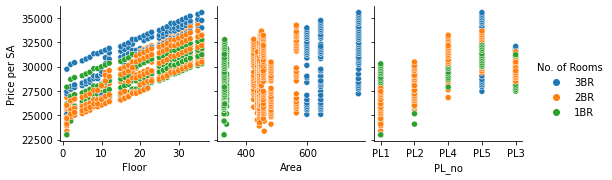

In [12]:
sns.pairplot(pl_released, y_vars = 'Price per SA', x_vars = ['Floor', 'Area', 'PL_no'], hue = 'No. of Rooms')

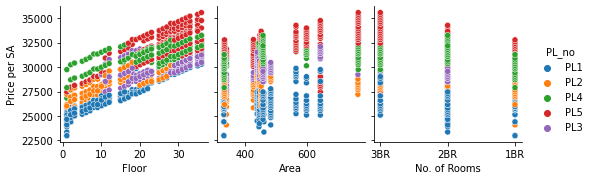

In [13]:
sns.pairplot(pl_released, y_vars = 'Price per SA', x_vars = ['Floor', 'Area', 'No. of Rooms'], hue = 'PL_no')

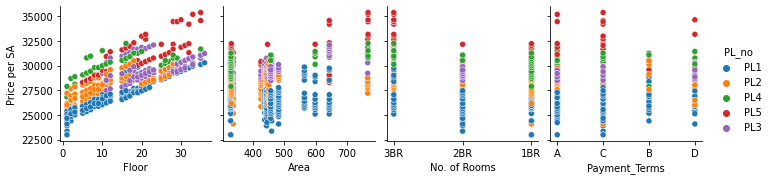

In [14]:
sns.pairplot(sold, y_vars = 'Price per SA', x_vars = ['Floor', 'Area', 'No. of Rooms', 'Payment_Terms'], hue = 'PL_no')

In [26]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(sold[['Price per SA']])

# Transform the data using the fitted scaler
sold['Price_psa_ss'] = SS_scaler.transform(sold[['Price per SA']])

# Compare the origional and transformed column
print(sold[['Price per SA', 'Price_psa_ss']].head())


   Price per SA  Price_psa_ss
0       25096.0     -1.479917
1       23903.0     -2.041468
2       24518.0     -1.751985
3       25574.0     -1.254920
4       25843.0     -1.128301


In [27]:
# Scale numerical features
SS_scaler.fit(sold[['Area']])
sold['Area_ss'] = SS_scaler.transform(sold[['Area']])

SS_scaler.fit(sold[['Floor']])
sold['Floor_ss'] = SS_scaler.transform(sold[['Floor']])

# Encode categorical features
features = ['Tower', 'Floor_ss', 'Unit', 'Area_ss', 'No. of Rooms', 'PL_no', 'Payment_Terms']
X = pd.get_dummies(sold[features])

# target variable: Price per SA
y = sold['Price_psa_ss']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 975
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Floor_ss          500 non-null    float64
 1   Area_ss           500 non-null    float64
 2   Tower_Tower 1A    500 non-null    uint8  
 3   Tower_Tower 1B    500 non-null    uint8  
 4   Tower_Tower 2A    500 non-null    uint8  
 5   Tower_Tower 2B    500 non-null    uint8  
 6   Unit_A            500 non-null    uint8  
 7   Unit_B            500 non-null    uint8  
 8   Unit_C            500 non-null    uint8  
 9   Unit_D            500 non-null    uint8  
 10  Unit_E            500 non-null    uint8  
 11  Unit_F            500 non-null    uint8  
 12  Unit_G            500 non-null    uint8  
 13  Unit_H            500 non-null    uint8  
 14  Unit_J            500 non-null    uint8  
 15  Unit_K            500 non-null    uint8  
 16  No. of Rooms_1BR  500 non-null    uint8  
 1

In [29]:
X_train

,Floor_ss,Area_ss,Tower_Tower 1A,Tower_Tower 1B,Tower_Tower 2A,Tower_Tower 2B,Unit_A,Unit_B,Unit_C,Unit_D,...,No. of Rooms_3BR,PL_no_PL1,PL_no_PL2,PL_no_PL3,PL_no_PL4,PL_no_PL5,Payment_Terms_A,Payment_Terms_B,Payment_Terms_C,Payment_Terms_D
115,0.387142,-0.086069,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
362,0.387142,0.049633,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
442,1.605266,0.049633,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
527,-0.941720,2.644942,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
835,-0.388028,0.024189,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.276403,-1.044468,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
283,-0.941720,-1.052949,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
915,0.719357,0.024189,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
300,-0.720243,-1.052949,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [30]:
y_train.head()

115    0.427850
362    0.145898
442    0.903262
527    1.198394
835   -0.609584
Name: Price_psa_ss, dtype: float64